In [22]:
import os
import open3d as o3d
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import quaternion

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


In [23]:
"""data processing"""
def load_point_clouds():
    tmp_points = np.load('./data/point_cloud/test_v1/coordinates.npy')  # 270w points
    tmp_colors = np.load('./data/point_cloud/test_v1/colors.npy')

    tmp_down = o3d.geometry.PointCloud()
    tmp_down.points = o3d.utility.Vector3dVector(tmp_points)
    tmp_down.colors = o3d.utility.Vector3dVector(tmp_colors)

    return tmp_down

pcd_combined_down = load_point_clouds()

In [24]:
"""show 2D result"""
def transform_3D_to_2D(source):
    points = np.asarray(source.points)
    colors = np.asarray(source.colors)
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    r = colors[:, 0]
    g = colors[:, 1]
    b = colors[:, 2]

    lower_bound = min(y) + 0.015
    upper_bound = max(y) - 0.07

    valid = y < upper_bound
    
    X = x[valid]
    Y = y[valid]
    Z = z[valid]
    R = r[valid]
    G = g[valid]
    B = b[valid]

    valid_2=Y > lower_bound

    X = X[valid_2]
    Y = Y[valid_2]
    Z = Z[valid_2]
    R = R[valid_2]
    G = G[valid_2]
    B = B[valid_2]
    
    position = np.transpose(np.vstack((
        X,
        Y,
        Z,
    )))
    color = np.transpose(np.vstack((R, G, B)))

    new = o3d.geometry.PointCloud()
    new.points = o3d.utility.Vector3dVector(position[:, 0:3])
    new.colors = o3d.utility.Vector3dVector(color[:, 0:3])

    return new

def visualizatio_2D(pcd_combined_down):
  twoD_result = transform_3D_to_2D(pcd_combined_down)

  print('\nshowing 2D result')
  o3d.visualization.draw_geometries([twoD_result])

  return twoD_result

twoD_map = visualizatio_2D(pcd_combined_down)


showing 2D result


In [27]:
points = np.asarray(twoD_map.points)
colors = np.asarray(twoD_map.colors)

unique = np.unique(colors, axis = 0)
tmp = unique[3]
# print(unique)
print(tmp)

id = np.where(colors[:, 0] == tmp[0], colors[:, 1] == tmp[1], colors[:, 2] == tmp[2])
real = np.mean(points[id], axis = 0)
print(real)

x_interval = 0.4/304.
y_interval = -0.27/198.

pixel_x = (real[0] - (-0.14)) / x_interval + 15.
pixel_y = (real[2] - (0.17)) / y_interval + 9.

# real[2] = (-0.14 + (tmp_points[j][0] - 15.)*x_interval)*1000./255.*10.
# real[0] = (0.17 + (tmp_points[j][1] - 9.)*y_interval)*1000./255.*10.
print(int(pixel_x), int(pixel_y))

[0.17254902 0.62745098 0.17254902]
[ 0.00176037 -0.05329725  0.11261488]
122 51


(657719, 3)
(657721, 3)
(657722, 3)


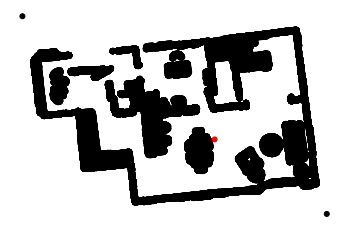

In [19]:
points = np.asarray(twoD_map.points)
print(points.shape)
tmp = np.array([[0.17, 0, -0.14],
                 [-0.1, 0, 0.26]])
points = np.vstack((points, tmp))
print(points.shape)

points = np.vstack((points, real))
print(points.shape)

colors = ['k'] * points.shape[0]
colors[points.shape[0]-1] = 'r'

plt.axis('off')
plt.scatter(points[:, 2]*1000./255.*10.,  points[:, 0]*1000./255.*10, s = 100, marker = '.', c = colors)
plt.savefig('./RRT/map.png', bbox_inches = 'tight', pad_inches = 0)
#plt.show()

In [20]:
print(np.min(points[:, 2]))
print(np.max(points[:, 2]))

-0.14
0.26


In [21]:
print(np.min(points[:, 0]))
print(np.max(points[:, 0]))

-0.1
0.17
